In [18]:
from pathlib import Path

from toolbox_continu_inzicht import Config, DataAdapter
from toolbox_continu_inzicht.fragility_curves import (
    ChangeCrestHeightFragilityCurveOvertopping,
    FragilityCurvesOvertopping,
    ShiftFragilityCurveOvertopping,
)

In [2]:
path = Path.cwd() / "data_sets"
config = Config(config_path=path / "test_fragility_multiple_curves_overtopping.yaml")
config.lees_config()
data_adapter = DataAdapter(config=config)

In [3]:
fragility_curves_overtopping = FragilityCurvesOvertopping(data_adapter=data_adapter)
fragility_curves_overtopping.run(
    input=["slopes", "profiles", "bedlevel_fetch"],
    output="fragility_curves",
)

In [4]:
ids = fragility_curves_overtopping.df_out.section_id.unique()
df = fragility_curves_overtopping.df_out.set_index("waterlevels")

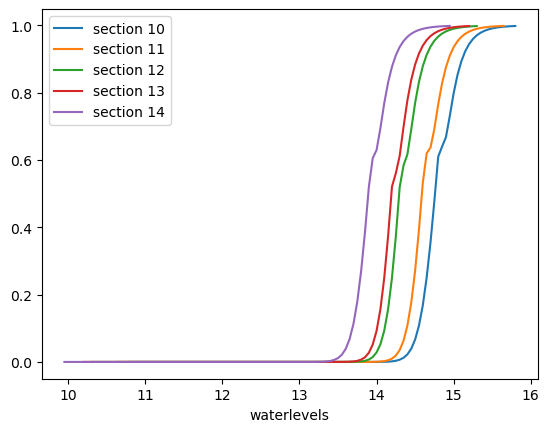

In [5]:
import matplotlib.pyplot as plt

In [11]:
shift_fragility_curves_overtopping = FragilityCurvesOvertopping(
    data_adapter=data_adapter
)
shift_fragility_curves_overtopping.fragility_curve_function = (
    ShiftFragilityCurveOvertopping
)
shift_fragility_curves_overtopping.effect = 0.5
shift_fragility_curves_overtopping.run(
    input=["slopes", "profiles", "bedlevel_fetch"],
    output="fragility_curves",
)

In [13]:
df_shift = shift_fragility_curves_overtopping.df_out.set_index("waterlevels")

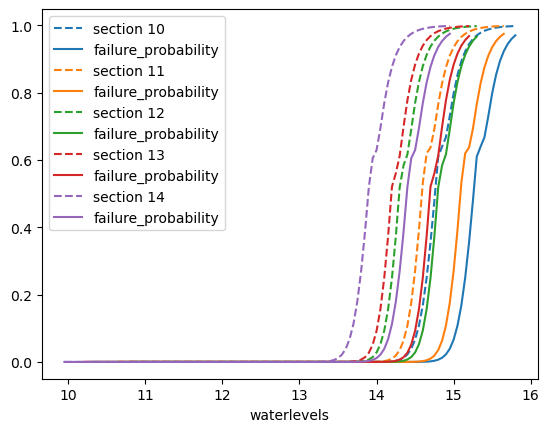

In [15]:
fig, ax = plt.subplots(1, 1)
for i, id in enumerate(ids):
    df[df["section_id"] == id]["failure_probability"].plot(
        color=f"C{i}", ls="--", label=f"section {id}", ax=ax
    )
    df_shift[df_shift["section_id"] == id]["failure_probability"].plot(
        color=f"C{i}", ax=ax
    )
ax.legend()

In [17]:
change_crest_fragility_curves_overtopping = FragilityCurvesOvertopping(
    data_adapter=data_adapter
)
change_crest_fragility_curves_overtopping.fragility_curve_function = (
    ChangeCrestHeightFragilityCurveOvertopping
)
change_crest_fragility_curves_overtopping.effect = 0.5
change_crest_fragility_curves_overtopping.run(
    input=["slopes", "profiles", "bedlevel_fetch"],
    output="fragility_curves",
)

In [19]:
df_change_crest = change_crest_fragility_curves_overtopping.df_out.set_index(
    "waterlevels"
)

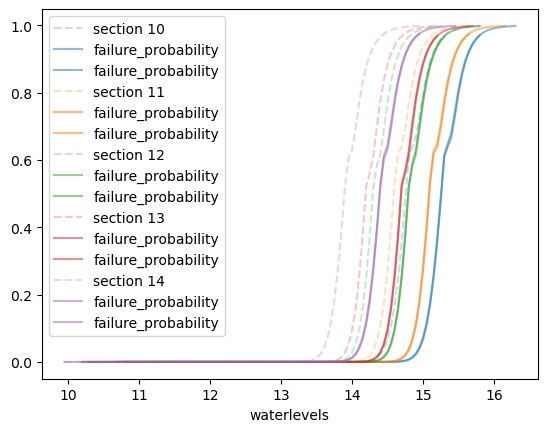

In [20]:
fig, ax = plt.subplots(1, 1)
for i, id in enumerate(ids):
    df[df["section_id"] == id]["failure_probability"].plot(
        color=f"C{i}", ls="--", label=f"section {id}", ax=ax, alpha=0.25
    )
    df_shift[df_shift["section_id"] == id]["failure_probability"].plot(
        color=f"C{i}", ax=ax, alpha=0.5
    )
    df_change_crest[df_change_crest["section_id"] == id]["failure_probability"].plot(
        color=f"C{i}", ax=ax, alpha=0.5
    )
ax.legend()